In [1]:
%cd /content/drive/MyDrive/Graduation_Project

/content/drive/MyDrive/Graduation_Project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split



# **Note:**
>* *The first dataframe, which named (df), we drop all columns which contain
large number of (Nan), and fill (Nan), where the columns contain small numbers of (Nan), with **mean** for numerical columns and **mode** for categorical columns, also we will drop all (object) type columns which describe location of accidents and use **latitude and longitude which describe location numerically**.*
>* *The Third dataframe, which is named (df3), we **drop** all (Nan) values and drop all location columns which has (object) type and replace it by the latitude and longitude columns.*


In [ ]:
pd.options.display.max_columns = False
df = pd.read_csv('cleaned_data_version.csv')
df

,Unnamed: 0,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.010,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
1,3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.010,I-75 S,R,Dayton,Montgomery,OH,US/Eastern,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.010,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,5,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.010,Westerville Rd,R,Westerville,Franklin,OH,US/Eastern,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,6,2,2016-02-08 07:59:35,2016-02-08 08:29:35,0.000,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800980,2243931,2,2017-08-30 19:03:55,2017-08-31 01:03:55,0.533,Santa Ana Fwy S,R,Tustin,Orange,CA,US/Pacific,80.1,56.0,29.68,10.0,SSW,9.2,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1800981,2243932,2,2017-08-30 19:45:10,2017-08-31 01:45:10,0.752,Riverside Fwy E,R,Anaheim,Orange,CA,US/Pacific,88.0,39.0,29.68,10.0,West,3.5,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
1800982,2243933,3,2017-08-30 19:48:10,2017-08-31 01:48:10,0.531,US-101 N,R,Los Angeles,Los Angeles,CA,US/Pacific,91.9,33.0,29.67,10.0,ESE,5.8,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
1800983,2243936,3,2017-08-30 20:03:10,2017-08-31 02:03:10,1.216,I-10 E,R,Redlands,San Bernardino,CA,US/Pacific,98.6,19.0,29.75,6.0,SW,6.9,Haze,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [3]:
df3 = pd.read_csv('https://media.githubusercontent.com/media/AI-Capacity-Building/AI-Capacity-Building/main/accidents_usecase/US_Accidents_May19.csv')
df3

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243934,A-2243935,Bing,NaN,2,2017-08-30 20:01:40,2017-08-31 02:01:40,34.055160,-118.214070,34.058220,-118.214270,...,False,False,False,False,False,False,Night,Night,Day,Day
2243935,A-2243936,Bing,NaN,2,2017-08-30 20:01:40,2017-08-31 02:01:40,34.046740,-118.214800,34.055160,-118.214070,...,False,False,False,False,False,False,Night,Night,Day,Day
2243936,A-2243937,Bing,NaN,3,2017-08-30 20:03:10,2017-08-31 02:03:10,34.031850,-117.135910,34.025370,-117.116160,...,False,False,False,False,False,False,Night,Night,Day,Day
2243937,A-2243938,Bing,NaN,4,2017-08-30 20:49:40,2017-08-31 02:49:40,34.277860,-118.608280,34.266581,-118.640372,...,False,False,False,False,False,False,Night,Night,Night,Night


# **Preprocessing**

In [4]:
df3.isna().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

In [ ]:
df.info()

In [ ]:
df3.drop(['ID' ,
          'Source' ,
          'Country',
          'Start_Time' ,
          'End_Time' ,
          'Description' ,
          'Weather_Timestamp' ,
          'Wind_Chill(F)',
          'Precipitation(in)',
          'End_Lat' ,
          'End_Lng' ,
          'Number' ,
          ],
          inplace = True , axis = 1 )

In [ ]:
df.drop(['Unnamed: 0',
         'Start_Time', 'End_Time' ,
         ] , axis = 1 , inplace = True)

In [ ]:
df['latitude'] = df3['Start_Lat']
df['longitude'] = df3['Start_Lng']
df['Zipcode'] = df3['Zipcode']
df['TMC'] = df3['TMC']
df['Airport_Code'] = df3['Airport_Code']
df

,Severity,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,latitude,longitude,Zipcode,TMC,Airport_Code
0,2,0.010,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,39.865147,-84.058723,45424,201.0,KFFO
1,3,0.010,I-75 S,R,Dayton,Montgomery,OH,US/Eastern,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,39.928059,-82.831184,43068-3402,201.0,KCMH
2,2,0.010,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,39.063148,-84.032608,45176,201.0,KI69
3,3,0.010,Westerville Rd,R,Westerville,Franklin,OH,US/Eastern,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,39.747753,-84.205582,45417,201.0,KDAY
4,2,0.000,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,39.627781,-84.188354,45459,201.0,KMGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800980,2,0.533,Santa Ana Fwy S,R,Tustin,Orange,CA,US/Pacific,80.1,56.0,29.68,10.0,SSW,9.2,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,38.752790,-76.154670,21601,NaN,KESN
1800981,2,0.752,Riverside Fwy E,R,Anaheim,Orange,CA,US/Pacific,88.0,39.0,29.68,10.0,West,3.5,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,33.571160,-84.529940,30291,NaN,KATL
1800982,3,0.531,US-101 N,R,Los Angeles,Los Angeles,CA,US/Pacific,91.9,33.0,29.67,10.0,ESE,5.8,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,28.436220,-81.359460,32824,NaN,KMCO
1800983,3,1.216,I-10 E,R,Redlands,San Bernardino,CA,US/Pacific,98.6,19.0,29.75,6.0,SW,6.9,Haze,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Day,Day,41.697580,-86.809270,46360,NaN,KMGC


In [ ]:
df3

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,201.0,3,39.865147,-84.058723,0.010,I-70 E,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
1,201.0,2,39.928059,-82.831184,0.010,Brice Rd,L,Reynoldsburg,Franklin,OH,...,False,False,False,False,False,False,Night,Night,Night,Day
2,201.0,2,39.063148,-84.032608,0.010,State Route 32,R,Williamsburg,Clermont,OH,...,False,False,False,False,True,False,Night,Night,Day,Day
3,201.0,3,39.747753,-84.205582,0.010,I-75 S,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Day,Day,Day
4,201.0,2,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243934,NaN,2,34.055160,-118.214070,0.212,San Bernardino Fwy E,R,Los Angeles,Los Angeles,CA,...,False,False,False,False,False,False,Night,Night,Day,Day
2243935,NaN,2,34.046740,-118.214800,0.583,I-5 N,R,Los Angeles,Los Angeles,CA,...,False,False,False,False,False,False,Night,Night,Day,Day
2243936,NaN,3,34.031850,-117.135910,1.216,I-10 E,R,Redlands,San Bernardino,CA,...,False,False,False,False,False,False,Night,Night,Day,Day
2243937,NaN,4,34.277860,-118.608280,1.991,Ronald Reagan Fwy W,R,Chatsworth,Los Angeles,CA,...,False,False,False,False,False,False,Night,Night,Night,Night


> * We transform object zipcode to float which help the ML model to react with.

In [ ]:
mytable2 = str.maketrans("-", ".")
df['Zipcode'] = df['Zipcode'].str.translate(mytable2)
df['Zipcode'] = df['Zipcode'].astype('float64')
df3['Zipcode'] = df3['Zipcode'].str.translate(mytable2)
df3['Zipcode'] = df3['Zipcode'].astype('float64')
df['Zipcode'] , df3['Zipcode']

0          45424.0000
1          43068.3402
2          45176.0000
3          45417.0000
4          45459.0000
              ...    
2243934    90033.0000
2243935    90033.0000
2243936    92373.0000
2243937    91311.0000
2243938    91342.0000
Name: Zipcode, Length: 2243939, dtype: float64

> * Here we impute nan in latitude, longtitude, TMC, and Zipcode column with **mean** using **SimpleImputer** of sklearn

In [ ]:
df3.dropna(inplace = True)
df3

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,201.0,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,OH,...,False,False,False,False,True,False,Night,Night,Day,Day
3,201.0,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Day,Day,Day
4,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,...,False,False,False,False,True,False,Day,Day,Day,Day
5,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,Franklin,OH,...,False,False,False,False,False,False,Day,Day,Day,Day
6,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727171,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,R,Tarzana,Los Angeles,CA,...,False,False,False,False,True,False,Day,Day,Day,Day
1727173,201.0,3,34.031322,-118.433723,0.00,I-10 W,R,Los Angeles,Los Angeles,CA,...,False,False,False,False,False,False,Day,Day,Day,Day
1727174,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,L,Rialto,San Bernardino,CA,...,False,False,False,False,False,False,Day,Day,Day,Day
1727175,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,R,Norwalk,Los Angeles,CA,...,False,False,False,False,False,False,Night,Night,Day,Day


In [ ]:
df3.reset_index(inplace = True )
df3

,index,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,201.0,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,...,False,False,False,False,True,False,Night,Night,Day,Day
1,3,201.0,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,...,False,False,False,False,False,False,Night,Day,Day,Day
2,4,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,False,False,False,False,True,False,Day,Day,Day,Day
3,5,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,Franklin,...,False,False,False,False,False,False,Day,Day,Day,Day
4,6,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,Montgomery,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369219,1727171,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,R,Tarzana,Los Angeles,...,False,False,False,False,True,False,Day,Day,Day,Day
1369220,1727173,201.0,3,34.031322,-118.433723,0.00,I-10 W,R,Los Angeles,Los Angeles,...,False,False,False,False,False,False,Day,Day,Day,Day
1369221,1727174,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,L,Rialto,San Bernardino,...,False,False,False,False,False,False,Day,Day,Day,Day
1369222,1727175,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,R,Norwalk,Los Angeles,...,False,False,False,False,False,False,Night,Night,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800985 entries, 0 to 1800984
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Distance(mi)           float64
 5   Street                 object 
 6   Side                   object 
 7   City                   object 
 8   County                 object 
 9   State                  object 
 10  Timezone               object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Weather_Condition      object 
 18  Amenity                bool   
 19  Bump                   bool   
 20  Crossing               bool   
 21  Give_Way               bool   
 22  Junction          

## **Map(False,True) with 0/1**

In [ ]:

def trans_to_bool_num(df_):
  for x in df_.columns:
    if df_[x].dtype == bool :
      df_[x] = df_[x].astype('int8')


In [ ]:
trans_to_bool_num(df3)
df3

,index,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,201.0,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,...,0,0,0,0,1,0,Night,Night,Day,Day
1,3,201.0,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,...,0,0,0,0,0,0,Night,Day,Day,Day
2,4,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,0,0,0,0,1,0,Day,Day,Day,Day
3,5,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,Franklin,...,0,0,0,0,0,0,Day,Day,Day,Day
4,6,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,Montgomery,...,0,0,0,0,0,0,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369219,1727171,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,R,Tarzana,Los Angeles,...,0,0,0,0,1,0,Day,Day,Day,Day
1369220,1727173,201.0,3,34.031322,-118.433723,0.00,I-10 W,R,Los Angeles,Los Angeles,...,0,0,0,0,0,0,Day,Day,Day,Day
1369221,1727174,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,L,Rialto,San Bernardino,...,0,0,0,0,0,0,Day,Day,Day,Day
1369222,1727175,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,R,Norwalk,Los Angeles,...,0,0,0,0,0,0,Night,Night,Day,Day


In [ ]:
trans_to_bool_num(df)
df

,Severity,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,latitude,longitude,Zipcode,TMC,Airport_Code
0,2,0.010,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,Night,Night,Day,Day,45424.0000,-84.058723,39.865147,201.000000,KFFO
1,3,0.010,I-75 S,R,Dayton,Montgomery,OH,US/Eastern,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Day,Day,Day,43068.3402,-82.831184,39.928059,201.000000,KCMH
2,2,0.010,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,1,0,Day,Day,Day,Day,45176.0000,-84.032608,39.063148,201.000000,KI69
3,3,0.010,Westerville Rd,R,Westerville,Franklin,OH,US/Eastern,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day,45417.0000,-84.205582,39.747753,201.000000,KDAY
4,2,0.000,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,0,0,0,0,0,0,0,0,0,0,0,0,0,Day,Day,Day,Day,45459.0000,-84.188354,39.627781,201.000000,KMGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800980,2,0.533,Santa Ana Fwy S,R,Tustin,Orange,CA,US/Pacific,80.1,56.0,29.68,10.0,SSW,9.2,Partly Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0,Day,Day,Day,Day,21601.0000,-76.154670,38.752790,207.352743,KESN
1800981,2,0.752,Riverside Fwy E,R,Anaheim,Orange,CA,US/Pacific,88.0,39.0,29.68,10.0,West,3.5,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Night,Day,Day,30291.0000,-84.529940,33.571160,207.352743,KATL
1800982,3,0.531,US-101 N,R,Los Angeles,Los Angeles,CA,US/Pacific,91.9,33.0,29.67,10.0,ESE,5.8,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Night,Day,Day,32824.0000,-81.359460,28.436220,207.352743,KMCO
1800983,3,1.216,I-10 E,R,Redlands,San Bernardino,CA,US/Pacific,98.6,19.0,29.75,6.0,SW,6.9,Haze,0,0,0,0,1,0,0,0,0,0,0,0,0,Night,Night,Day,Day,46360.0000,-86.809270,41.697580,207.352743,KMGC


* Remove **('US/')** from Timezone columns as all data about US, so it is **useless**

In [ ]:
mytable = str.maketrans("", "","US/")
df['Timezone'] = df['Timezone'].str.translate(mytable)
df3['Timezone'] = df3['Timezone'].str.translate(mytable)
df3['Timezone'] ,df['Timezone']

0          Eastern
1          Eastern
2          Eastern
3          Eastern
4          Eastern
            ...   
1369219    Pacific
1369220    Pacific
1369221    Pacific
1369222    Pacific
1369223    Pacific
Name: Timezone, Length: 1369224, dtype: object

### **Here we need to get all columns name which are categorical**

In [ ]:
def cat_cols(dataframe):
  categorical_cols = dataframe.select_dtypes(exclude= 'number').columns.tolist()
  return categorical_cols

## **Determine category columns and make there type as category data-type**

### **Using get_dummies is not useful as it take too much compute units due to large data**
> *  **Impelement (*get_dummies*) from scratch to facilitate reacting with huge data**


In [ ]:
def GetDummies(arg):
  import pandas as pd
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder
  encodded_street = None
  lab_encoder = LabelEncoder()
  label_feat = lab_encoder.fit_transform(arg)
  label_feat = label_feat.reshape(arg.shape[0] , 1)
  one_hot = OneHotEncoder(sparse = False , categories= 'auto')
  final =  one_hot.fit_transform(label_feat)
  return final



In [ ]:
df_cop = df.copy()
df3_cop = df3.copy()

In [ ]:
categorical_cols_res_df3, categorical_cols_res_df = cat_cols(df3_cop) , cat_cols(df_cop)
categorical_cols_res_df3

['Street',
 'Side',
 'City',
 'County',
 'State',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
def to_cat(X_ , cat_cols):
  res = X_.copy()
  for col in cat_cols:
    res[col] = res[col].astype('category')
  return res

In [ ]:
df3_cat = to_cat(df3_cop , categorical_cols_res_df3)
df_cat = to_cat(df_cop , categorical_cols_res_df)

In [ ]:
for i in df_cat.columns:
  if df_cat[i].dtypes == 'category':
    print(f'{i}',df_cat[i].nunique())

Street 120926
Side 3
City 10313
County 1630
State 49
Timezone 4
Wind_Direction 17
Weather_Condition 59
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2
Airport_Code 1803


In [ ]:
for i in df3_cat.columns:
  if df3_cat[i].dtypes == 'category':
    print(f'{i}',df3_cat[i].nunique())

Street 98221
Side 3
City 8816
County 1463
State 49
Timezone 4
Airport_Code 1694
Wind_Direction 17
Weather_Condition 57
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


In [ ]:
res = np.concatenate(
                      (
                      GetDummies(df3_cat['State']) ,
                      GetDummies(df3_cat['Timezone']) ,
                      GetDummies(df3_cat['Wind_Direction']) ,
                      GetDummies(df3_cat['Weather_Condition']) ,
                      GetDummies(df3_cat['Civil_Twilight']) ,
                      GetDummies(df3_cat['Nautical_Twilight']),
                      GetDummies(df3_cat['Astronomical_Twilight']),
                      GetDummies(df3_cat['Sunrise_Sunset']),
                      GetDummies(df3_cat['Side']),
                      GetDummies(df3_cat['Airport_Code']),
                      ) , axis = 1 )
res

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
np.shape(res)

(1369224, 133)

In [ ]:
temp = df3_cat['State'].unique()
temp2 = np.concatenate((temp, df3_cat['Timezone'].unique()))
uniques = np.concatenate(
                        (
                          temp2 ,
                          df3_cat['Wind_Direction'].unique() ,
                          df3_cat['Weather_Condition'].unique(),
                          df3_cat['Nautical_Twilight'].unique() ,
                          df3_cat['Civil_Twilight'].unique(),
                          df3_cat['Astronomical_Twilight'].unique(),
                          df3_cat['Sunrise_Sunset'].unique(),
                          df3_cat['Side'].unique(),
                          df3_cat['Airport_Code'].unique(),
                        ),
                     axis = 0 )
np.shape(uniques)

(138,)

In [ ]:
res_df = pd.DataFrame(res , columns=uniques , dtype='int8')
res_df

,OH,WV,CA,FL,GA,SC,NE,IA,IL,MO,...,Night,Night,Day,Day,Night,Night,Day,R,L,
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369219,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1369220,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1369221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1369222,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,1


In [ ]:
for col in res_df.columns:
  df3_cat[f'{col}'] = res_df[col].astype('int8')
df3_cat = pd.concat([df3_cat , res_df] , axis = 1 , join = 'inner')
df3_cat

,index,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,...,Night,Night,Day,Day,Night,Night,Day,R,L,
0,2,201.0,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,...,1,1,0,1,0,0,1,0,0,1
1,3,201.0,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,...,0,1,0,1,0,0,1,0,0,1
2,4,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,...,0,1,0,1,0,1,0,0,0,1
3,5,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,Franklin,...,0,1,0,1,0,1,0,0,0,1
4,6,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,Montgomery,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369219,1727171,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,R,Tarzana,Los Angeles,...,0,1,0,1,0,1,0,0,0,1
1369220,1727173,201.0,3,34.031322,-118.433723,0.00,I-10 W,R,Los Angeles,Los Angeles,...,0,1,0,1,0,1,0,0,0,1
1369221,1727174,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,L,Rialto,San Bernardino,...,0,1,0,1,0,1,0,0,1,0
1369222,1727175,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,R,Norwalk,Los Angeles,...,1,1,0,1,0,0,1,0,0,1


In [ ]:
df3_cat.drop([
              'State' ,
              'index' ,
              'Wind_Direction' ,
              'Timezone'  ,'Side','Sunrise_Sunset',
              'Weather_Condition' ,
              'Nautical_Twilight' ,
              'Civil_Twilight' ,
              'Astronomical_Twilight'
              ] , axis = 1 , inplace = True )
df3_cat

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,Zipcode,Airport_Code,...,Night,Night,Day,Day,Night,Night,Day,R,L,
0,201.0,2,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,45176.0000,KI69,...,1,1,0,1,0,0,1,0,0,1
1,201.0,3,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,45417.0000,KDAY,...,0,1,0,1,0,0,1,0,0,1
2,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,45459.0000,KMGY,...,0,1,0,1,0,1,0,0,0,1
3,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,Westerville,Franklin,43081.0000,KCMH,...,0,1,0,1,0,1,0,0,0,1
4,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,Dayton,Montgomery,45417.2476,KDAY,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369219,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,Tarzana,Los Angeles,91356.0000,KVNY,...,0,1,0,1,0,1,0,0,0,1
1369220,201.0,3,34.031322,-118.433723,0.00,I-10 W,Los Angeles,Los Angeles,90064.0000,KSMO,...,0,1,0,1,0,1,0,0,0,1
1369221,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,Rialto,San Bernardino,92376.5157,KSBD,...,0,1,0,1,0,1,0,0,1,0
1369222,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,Norwalk,Los Angeles,90650.0000,KFUL,...,1,1,0,1,0,0,1,0,0,1


In [ ]:
df3_cat.to_csv('df3_cat.csv'  , index= False)

In [ ]:
pd.options.display.max_rows = None
display(df3_cat.dtypes)

In [ ]:
cate_cols = df3_cat.select_dtypes(exclude= 'number').columns.tolist()
cate_cols
for i in cate_cols:
  print(f'{i}',df3_cat[i].nunique())

Street 98221
City 8816
County 1463
Airport_Code 1694


# **Modeling**

### **Splitting**

In [ ]:
# Spliting for fist dataframe
X, y = df_cat.drop('Severity' , axis = 1 ), df_cat['Severity']
X_df3, y_df3 = df3_cat.drop('Severity' , axis = 1 ), df3_cat['Severity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25)
X_train_df3,X_test_df3, y_train_df3, y_test_df3 = train_test_split(X_df3 , y_df3 , test_size = 0.25)

### **ML Model**

In [ ]:
import xgboost as xgb

dtrain_clf = xgb.DMatrix(X_train , y_train , enable_categorical = True)
dtest_clf = xgb.DMatrix(X_test, y_test , enable_categorical = True )
dtrain_clf_df3 = xgb.DMatrix(X_train_df3 , y_train_df3 , enable_categorical = True)
dtest_clf_df3 = xgb.DMatrix(X_test_df3, y_test_df3 , enable_categorical = True )


In [ ]:
params = {
    "objective" : "multi:softprob" ,
    "tree_method": "gpu_hist" ,
    "num_class": 5 ,

  }
n = 1000

results = xgb.cv(
    params= params ,
    dtrain= dtrain_clf ,
    num_boost_round= n ,
    nfold= 5 ,
    metrics = ["mlogloss", "auc", "merror"]
)

In [ ]:
results

,train-mlogloss-mean,train-mlogloss-std,train-auc-mean,train-auc-std,train-merror-mean,train-merror-std,test-mlogloss-mean,test-mlogloss-std,test-auc-mean,test-auc-std,test-merror-mean,test-merror-std
0,1.234397,0.000901,0.821016,0.002813,0.259746,0.002282,1.236135,0.000423,NaN,NaN,0.262291,0.001769
1,1.027002,0.001516,0.848972,0.002779,0.234213,0.005145,1.030246,0.001098,NaN,NaN,0.237425,0.005179
2,0.892910,0.001207,0.857449,0.002269,0.222073,0.004623,0.897463,0.000970,NaN,NaN,0.225777,0.004271
3,0.796828,0.000767,0.863874,0.000843,0.222415,0.006300,0.802551,0.001705,NaN,NaN,0.227006,0.006452
4,0.725716,0.000934,0.869480,0.001241,0.214691,0.003140,0.732597,0.001735,NaN,NaN,0.219755,0.002311
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.141444,0.000487,0.991772,0.000056,0.040007,0.000198,0.367418,0.001664,NaN,NaN,0.133791,0.000581
996,0.141340,0.000487,0.991786,0.000053,0.039973,0.000189,0.367456,0.001679,NaN,NaN,0.133780,0.000586
997,0.141231,0.000495,0.991801,0.000055,0.039926,0.000185,0.367486,0.001679,NaN,NaN,0.133789,0.000587
998,0.141125,0.000497,0.991815,0.000057,0.039886,0.000197,0.367516,0.001681,NaN,NaN,0.133830,0.000580


In [ ]:
results['train-mlogloss-mean'].mean() , results['test-mlogloss-mean'].mean()

(0.24427037159732465, 0.37763511306530734)

<Figure size 640x480 with 0 Axes>

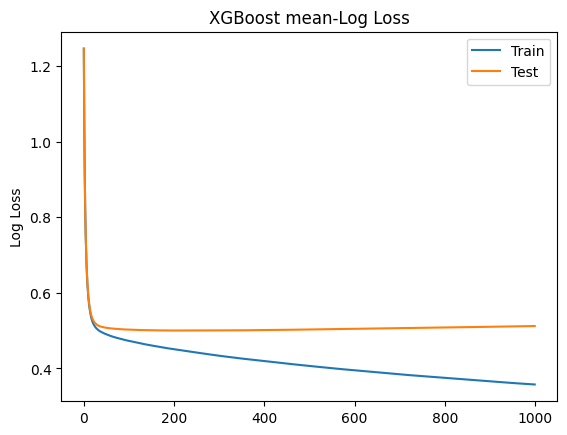

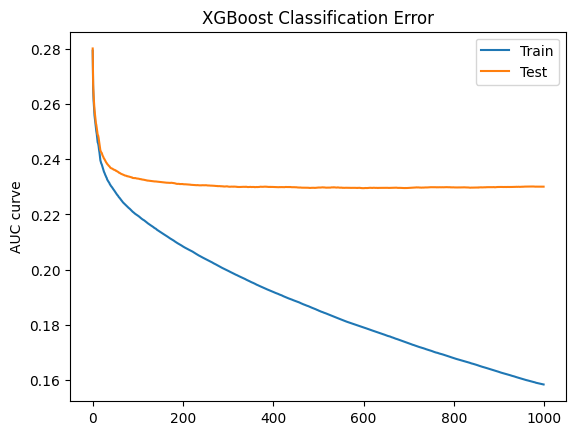

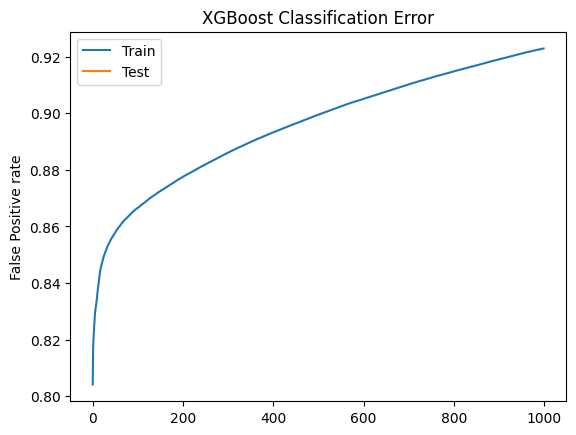

In [ ]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
x_axis = range(0,results.shape[1])
fig, ax = plt.subplots()

ax.plot(results[:]['train-mlogloss-mean'], label='Train')
ax.plot(results[:]['test-mlogloss-mean'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost mean-Log Loss')
plt.show()
print('\n\n\n')
# plot classification error
fig, ax = plt.subplots()
ax.plot(results[:]['train-merror-mean'], label='Train')
ax.plot(results[:]['test-merror-mean'], label='Test')
ax.legend()
plt.ylabel('AUC curve')
plt.title('XGBoost Classification Error')
plt.show()
print('\n\n\n')
# plot classification error
fig, ax = plt.subplots()
ax.plot(results[:]['train-auc-mean'], label='Train')
ax.plot(results[:]['test-auc-mean'], label='Test')
ax.legend()
plt.ylabel('True Positive rate')
plt.ylabel('False Positive rate')
plt.title('XGBoost Classification Error')
plt.show()

In [ ]:

params_df3 = {
    "objective" : "multi:softprob" ,
    "tree_method": "gpu_hist" ,
    "num_class": 5 ,

  }
n = 1000

results_df3 = xgb.cv(
    params= params_df3 ,
    dtrain= dtrain_clf_df3 ,
    num_boost_round= n ,
    nfold= 5 ,
    stratified = True,
    verbose_eval= True ,
    shuffle = True ,
    metrics = ["mlogloss", "merror"],
    early_stopping_rounds= 100 ,
)

[0]	train-mlogloss:1.19162+0.00119	train-merror:0.20497+0.00272	test-mlogloss:1.19312+0.00115	test-merror:0.20710+0.00231
[1]	train-mlogloss:0.96778+0.00154	train-merror:0.17970+0.00541	test-mlogloss:0.97047+0.00148	test-merror:0.18280+0.00520
[2]	train-mlogloss:0.82387+0.00147	train-merror:0.16746+0.00432	test-mlogloss:0.82739+0.00163	test-merror:0.17118+0.00449
[3]	train-mlogloss:0.72260+0.00146	train-merror:0.16060+0.00181	test-mlogloss:0.72691+0.00124	test-merror:0.16471+0.00175
[4]	train-mlogloss:0.64750+0.00082	train-merror:0.15541+0.00277	test-mlogloss:0.65258+0.00114	test-merror:0.15986+0.00259
[5]	train-mlogloss:0.58939+0.00093	train-merror:0.15228+0.00337	test-mlogloss:0.59526+0.00097	test-merror:0.15702+0.00292
[6]	train-mlogloss:0.54587+0.00159	train-merror:0.14916+0.00240	test-mlogloss:0.55245+0.00132	test-merror:0.15392+0.00245
[7]	train-mlogloss:0.50997+0.00176	train-merror:0.14397+0.00213	test-mlogloss:0.51739+0.00161	test-merror:0.14915+0.00202
[8]	train-mlogloss:0.480

In [ ]:
df3_cat

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,201.0,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,OH,...,0,0,0,0,1,0,Night,Night,Day,Day
3,201.0,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,Night,Day,Day,Day
4,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,...,0,0,0,0,1,0,Day,Day,Day,Day
5,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,R,Westerville,Franklin,OH,...,0,0,0,0,0,0,Day,Day,Day,Day
6,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727171,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,R,Tarzana,Los Angeles,CA,...,0,0,0,0,1,0,Day,Day,Day,Day
1727173,201.0,3,34.031322,-118.433723,0.00,I-10 W,R,Los Angeles,Los Angeles,CA,...,0,0,0,0,0,0,Day,Day,Day,Day
1727174,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,L,Rialto,San Bernardino,CA,...,0,0,0,0,0,0,Day,Day,Day,Day
1727175,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,R,Norwalk,Los Angeles,CA,...,0,0,0,0,0,0,Night,Night,Day,Day


In [ ]:
results_df3['test-mlogloss-mean'].mean() , results_df3['train-mlogloss-mean'].mean()

(0.23026029409252569, 0.17429546558887837)

<Figure size 640x480 with 0 Axes>

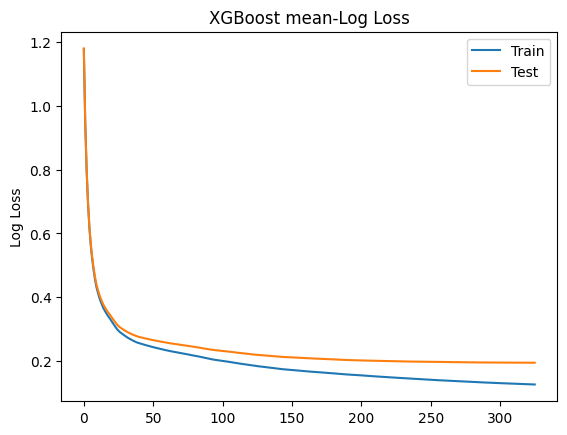

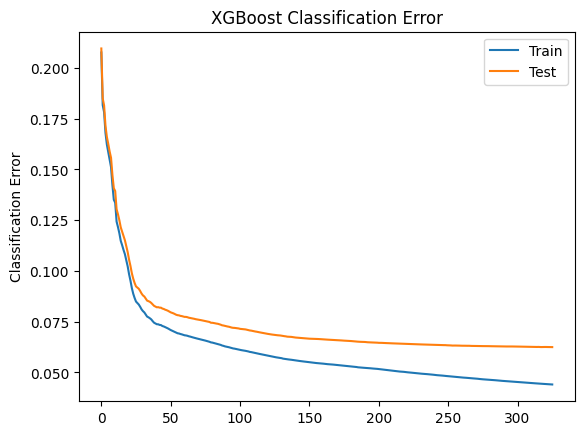

In [ ]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
x_axis = range(0 , results_df3.shape[0])
fig, ax = plt.subplots()
ax.plot(x_axis, results_df3[:]['train-mlogloss-mean'], label='Train')
ax.plot(x_axis, results_df3[:]['test-mlogloss-mean'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost mean-Log Loss')
plt.show()
print('\n\n\n')
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results_df3[:]['train-merror-mean'], label='Train')
ax.plot(x_axis, results_df3[:]['test-merror-mean'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### **I am important conclusion:**
> * ***The data frame which has dropped (NULL)* has better results, so we will use this type of data frame as trained data with any another learning algorithm**

# **We note that the data is unbalanced so we need to solve this problem while using learning algorithm**

In [1]:
%cd /content/drive/MyDrive/Graduation_Project

/content/drive/MyDrive/Graduation_Project


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import Precision , Recall , CategoricalCrossentropy , Accuracy
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorboard.plugins.hparams import api as hp

In [3]:
new_df = pd.read_csv('df3_cat.csv' , low_memory = False)
new_df

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,Zipcode,Airport_Code,...,Night,Night.1,Day.1,Day.2,Night.2,Night.3,Day.3,R,L,
0,201.0,2,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,45176.0000,KI69,...,1,1,0,1,0,0,1,0,0,1
1,201.0,3,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,45417.0000,KDAY,...,0,1,0,1,0,0,1,0,0,1
2,201.0,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,45459.0000,KMGY,...,0,1,0,1,0,1,0,0,0,1
3,201.0,3,40.100590,-82.925194,0.01,Westerville Rd,Westerville,Franklin,43081.0000,KCMH,...,0,1,0,1,0,1,0,0,0,1
4,201.0,2,39.758274,-84.230507,0.00,N Woodward Ave,Dayton,Montgomery,45417.2476,KDAY,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369219,201.0,2,34.173161,-118.535988,0.00,Reseda Blvd,Tarzana,Los Angeles,91356.0000,KVNY,...,0,1,0,1,0,1,0,0,0,1
1369220,201.0,3,34.031322,-118.433723,0.00,I-10 W,Los Angeles,Los Angeles,90064.0000,KSMO,...,0,1,0,1,0,1,0,0,0,1
1369221,201.0,3,34.106785,-117.369102,0.00,E Foothill Blvd,Rialto,San Bernardino,92376.5157,KSBD,...,0,1,0,1,0,1,0,0,1,0
1369222,201.0,3,33.924686,-118.103981,0.00,Manchester Ave,Norwalk,Los Angeles,90650.0000,KFUL,...,1,1,0,1,0,0,1,0,0,1


In [4]:
new_df['Street'] = new_df['Street'].astype('category')
new_df['Airport_Code'] = new_df['Airport_Code'].astype('category')
new_df['City'] = new_df['City'].astype('category')
new_df['County'] = new_df['County'].astype('category')

##  **Spliting data**

In [ ]:
X_newDf, y_newDf = new_df.drop('Severity' , axis = 1 ), new_df['Severity']
X_train_newDf,X_test_newDf, y_train_newDf, y_test_newDf = train_test_split(X_newDf , y_newDf , test_size = 0.4)

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score , precision_score , recall_score
xgb1 = XGBClassifier(
 tree_method = 'gpu_hist',
 max_depth= 7 ,
 reg_alpha = 3 ,
 objective= 'multi:softprob',
 learning_rate =0.1,
 n_estimators=1000,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 )


samp_weight = compute_sample_weight(
    class_weight= 'balanced' ,
    y = y_train_newDf
)
xgb1.fit(X_train_newDf , y_train_newDf ,
         sample_weight = samp_weight
         )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [ ]:
y_pred = xgb1.predict(X_test_newDf)
y_pred

array([2, 2, 2, ..., 3, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
repo = classification_report(y_test_newDf , y_pred)
print(repo)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.01      0.00      0.01       251
           2       0.93      0.85      0.89    350847
           3       0.76      0.89      0.82    196135
           4       0.27      0.17      0.21       449

    accuracy                           0.86    547690
   macro avg       0.39      0.38      0.38    547690
weighted avg       0.87      0.86      0.86    547690



In [ ]:
from sklearn.metrics import accuracy_score , balanced_accuracy_score
acc = accuracy_score(y_test_newDf , y_pred)
b_acc = balanced_accuracy_score(y_test_newDf , y_pred)
print(f'Accuracy: {(acc%2)}%')
print(f'balanced Accuracy: {(b_acc%2)}%')

Accuracy: 0.8600978655808943%
balanced Accuracy: 0.38222855740315503%


* **We can conclude that imbalancing in data could not solve by using sample weight parameter while fitting learning model.**
* **We will solve this problem using imlearn library.**

* **As we can see her that we need to undersample the majority classes.**


In [ ]:
new_df['Severity'].value_counts()

2    876830
3    490600
4      1132
1       645
0        17
Name: Severity, dtype: int64

In [5]:
new_df['Severity'] = new_df['Severity'].replace(0 , 1)
new_df['Severity'].value_counts()

2    876830
3    490600
4      1132
1       662
Name: Severity, dtype: int64

In [6]:
X, y = new_df.drop('Severity' , axis = 1 ), new_df['Severity']

In [7]:
encoder = LabelEncoder()
y=pd.Series(encoder.fit_transform(y))

In [ ]:
y.value_counts()

1    876830
2    490600
3      1132
0       662
dtype: int64

* **We will use random under-sampling to try to make our labels in the dependent variable (severity) balanced.**
* **To reduce our datapoints to make the learning model easly react with the data, we suffer from low precision and recall of minority calsses.**

In [8]:
sample = imblearn.under_sampling.RandomUnderSampler(
    sampling_strategy='majority'
    )
X,y = sample.fit_resample(X,y)

In [9]:
y.value_counts()

2    490600
3      1132
0       662
1       662
dtype: int64

* **We will over-sample all minor labels (0,1,3) to be with same support of label (2).**
* ***We take this step cause we need more data to imporve balanced accuracy of learning models.***

In [9]:
sampler = imblearn.over_sampling.RandomOverSampler()
X,y = sampler.fit_resample(X,y)

In [10]:
y.value_counts()

0    490600
1    490600
2    490600
3    490600
dtype: int64

In [12]:
X['Street'].nunique() ,X['Airport_Code'].nunique(),X['Street'].nunique() , X['County'].nunique(),X['City'].nunique()

(16269, 1345, 16269, 1045, 4560)

* **We will make Label encoding for categorical columns which has high number of unique values**

In [10]:
X['Street']=encoder.fit_transform(X['Street'])
X['Airport_Code']=encoder.fit_transform(X['Airport_Code'])
X['County']=encoder.fit_transform(X['County'])
X['City']=encoder.fit_transform(X['City'])

* **We will try to improve accuracy of the neural network by using standardization the data.**

In [11]:
X = StandardScaler().fit_transform(X,y)

* **We will transform X and y to csv files to help us reduce run-time of Standardization**

In [4]:
X = pd.read_csv('X.csv').values
y = pd.read_csv('y.csv').values

In [5]:
X_train,X_test, y_train, y_test = train_test_split(X , y , test_size = 0.4)

In [7]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1177440, 165), (1177440, 1), (784960, 165), (784960, 1))

In [62]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score , precision_score , recall_score
xgb1 = XGBClassifier(
 tree_method = 'gpu_hist',
 max_depth= 7 ,
 objective= 'multi:softprob',
 learning_rate =0.1,
 n_estimators=1500,
 gamma=40,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 )


xgb1.fit(X_train , y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=40, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, nthread=4, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [63]:
y_pred = xgb1.predict(X_test)
y_pred

array([0, 0, 1, ..., 3, 0, 2])

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
repo = classification_report(y_test , y_pred)
print(repo)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    196539
           1       0.95      1.00      0.98    196364
           2       0.97      0.87      0.92    195629
           3       0.96      0.98      0.97    196428

    accuracy                           0.96    784960
   macro avg       0.96      0.96      0.96    784960
weighted avg       0.96      0.96      0.96    784960



In [66]:
from sklearn.metrics import accuracy_score , balanced_accuracy_score
acc = round(accuracy_score(y_test , y_pred) , 2)*100
b_acc = round(balanced_accuracy_score(y_test , y_pred) , 2)*100
print(f'Accuracy: {(acc)}%')
print(f'balanced Accuracy: {(b_acc)}%')

Accuracy: 96.0%
balanced Accuracy: 96.0%


In [6]:
model = Sequential([

    Dense(units = 15, activation = 'relu', activity_regularizer= tf.keras.regularizers.L2(0.0001)),
    Dense(units = 30, activation = 'relu' , activity_regularizer= tf.keras.regularizers.L2(0.0001)),
    Dense(units = 40, activation = 'relu', activity_regularizer= tf.keras.regularizers.L2(0.0001)),
    Dense(units = 75, activation = 'relu', activity_regularizer= tf.keras.regularizers.L2(0.0001)),
    Dense(units = 30, activation = 'relu', activity_regularizer= tf.keras.regularizers.L2(0.0001)),
    Dense(units = 4, activation = 'sigmoid', activity_regularizer= tf.keras.regularizers.L2(0.0001)),
])
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer = tf.keras.optimizers.Adam(lr= 0.1) ,
    metrics = ['accuracy'],
)

In [ ]:
import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir, {
    'num_relu_units': 512,
    'dropout': 0.2
})

model.fit(X_train , y_train, batch_size=50 , epochs=50 ,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback, hparams_callback])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23549/23549 [==============================] - 180s 7ms/step - loss: 0.3966 - accuracy: 0.8540 - val_loss: 0.2363 - val_accuracy: 0.9268
Epoch 2/50
23549/23549 [==============================] - 211s 9ms/step - loss: 0.2108 - accuracy: 0.9384 - val_loss: 0.1999 - val_accuracy: 0.9439
Epoch 3/50
23549/23549 [==============================] - 175s 7ms/step - loss: 0.1758 - accuracy: 0.9522 - val_loss: 0.1651 - val_accuracy: 0.9583
Epoch 4/50
23549/23549 [==============================] - 174s 7ms/step - loss: 0.1612 - accuracy: 0.9579 - val_loss: 0.1609 - val_accuracy: 0.9586
Epoch 5/50
23549/23549 [==============================] - 216s 9ms/step - loss: 0.1543 - accuracy: 0.9607 - val_loss: 0.1439 - val_accuracy: 0.9644
Epoch 6/50
23549/23549 [==============================] - 214s 9ms/step - loss: 0.1468 - accuracy: 0.9634 - val_loss: 0.1515 - val_accuracy: 0.9629
Epoch 7/50
23549/23549 [==============================] - 173s 7ms/step - loss: 0.1422 - accuracy: 0.9650 - val_loss: 0.141

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                2490      
                                                                 
 dense_7 (Dense)             (None, 30)                480       
                                                                 
 dense_8 (Dense)             (None, 40)                1240      
                                                                 
 dense_9 (Dense)             (None, 75)                3075      
                                                                 
 dense_10 (Dense)            (None, 30)                2280      
                                                                 
 dense_11 (Dense)            (None, 4)                 124       
                                                                 
Total params: 9,689
Trainable params: 9,689
Non-traina

In [10]:
!pip install -U tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.2
    Uninstalling tensorboard-2.12.2:
      Successfully uninstalled tensorboard-2.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.13.0 which is incompatible.


In [8]:
!tensorboard dev upload --logdir ./logs \
  --name "ML_Proj_Grad" \
  --description "Training results from https://colab.research.google.com/drive/1xDvfKLMG_PJgRBlhqrrvHJzO-I3_mQSf#scrollTo=G3GUk-_aNZHl&uniqifier=4" \
  --one_shot

2023-06-23 15:03:05.016302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 

In [9]:
!tensorboard dev list

2023-06-23 15:03:57.328492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/l